In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

(1727, 7)
  Buying_Price Maintenance_Cost Door_Count Passenger_Capacity  \
0        vhigh            vhigh          2                  2   
1        vhigh            vhigh          2                  2   
2        vhigh            vhigh          2                  2   
3        vhigh            vhigh          2                  2   
4        vhigh            vhigh          2                  2   

  Luggage_Boot_Size Safety_Rating  class  
0             small           med  unacc  
1             small          high  unacc  
2               med           low  unacc  
3               med           med  unacc  
4               med          high  unacc  
Buying_Price          0
Maintenance_Cost      0
Door_Count            0
Passenger_Capacity    0
Luggage_Boot_Size     0
Safety_Rating         0
class                 0
dtype: int64


/var/folders/8l/txtmwrwx5fs5rvykj95qzxsc0000gn/T/ipykernel_10159/3234329526.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class", data=mycar, palette="flare")


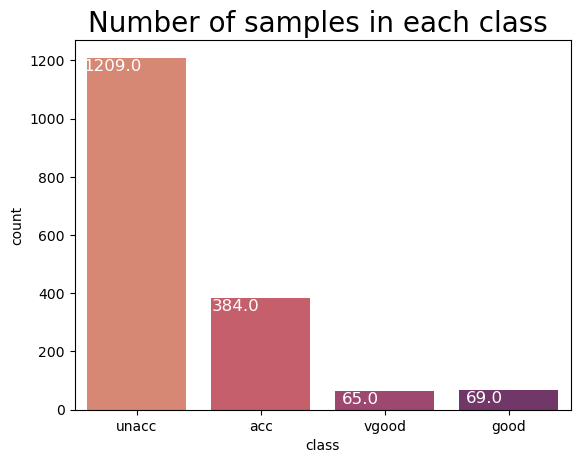

In [22]:
#Load the dataset into dataframe
mycar = pd.read_csv('Car Evaluation Week 4 Lab.csv')

# view dimensions of dataset
print(mycar.shape)
# preview the dataframe
mycar.head()

# The dataset contains 7 columns (features) and 1727 rows (instances).

'''
Renamed column names: gave proper column name 
'''
col_names = [
    "Buying_Price",      
    "Maintenance_Cost",  
    "Door_Count",        
    "Passenger_Capacity",
    "Luggage_Boot_Size", 
    "Safety_Rating",     
    "class"     
]

mycar.columns = col_names
#  preview the dataframe
print(mycar.head())
#Check the number of missing values
print(mycar.isnull().sum())

#mycar['class'].value_counts()  
x = mycar.drop('class', axis=1)
y = mycar['class']


# counting values of variables in 'diagnosis'
ax = sns.countplot(x="class", data=mycar, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

Passenger_Capacity    2    4  more
class                             
acc                   0  198   186
good                  0   36    33
unacc               575  312   322
vgood                 0   30    35
Safety_Rating  high  low  med
class                        
acc             204    0  180
good             30    0   39
unacc           277  575  357
vgood            65    0    0


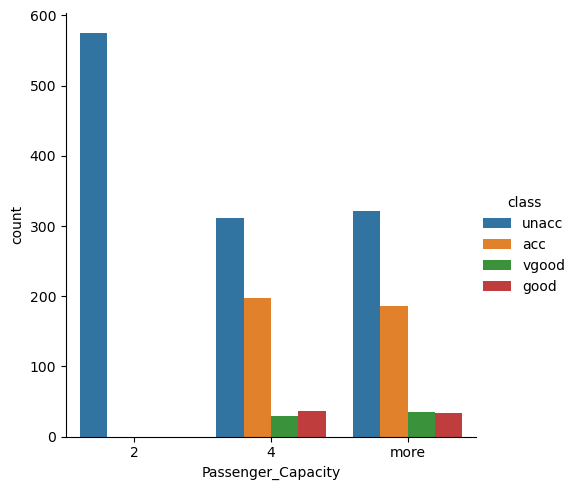

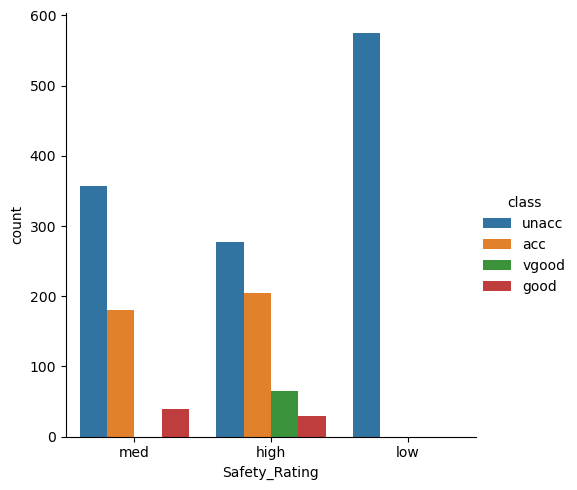

In [23]:
#Task Two 
print(pd.crosstab(mycar['class'], mycar['Passenger_Capacity']))
sns.catplot(data=mycar, x='Passenger_Capacity', hue='class', kind="count")
# Crosstab and barplot of safety by class
print(pd.crosstab(mycar['class'], mycar['Safety_Rating']))
sns.catplot(data=mycar, x='Safety_Rating', hue='class', kind="count")

In [26]:
#Task 3
# Subset dataset into input and output attributes
X = mycar[['Buying_Price', 'Maintenance_Cost', 'Door_Count', 'Passenger_Capacity', 'Luggage_Boot_Size', 'Safety_Rating']]
y = mycar['class']

nrows, ncols = mycar.shape

encoder = ce.OrdinalEncoder(cols=['Buying_Price', 'Maintenance_Cost', 'Door_Count', 'Passenger_Capacity', 'Luggage_Boot_Size', 'Safety_Rating'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=2)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1208, 6)
Test set shape: (519, 6)


Feature scores using Chi-square:  

Feature 0: 60.496660
Feature 1: 42.193451
Feature 2: 3.697092
Feature 3: 54.809771
Feature 4: 13.909164
Feature 5: 56.675758


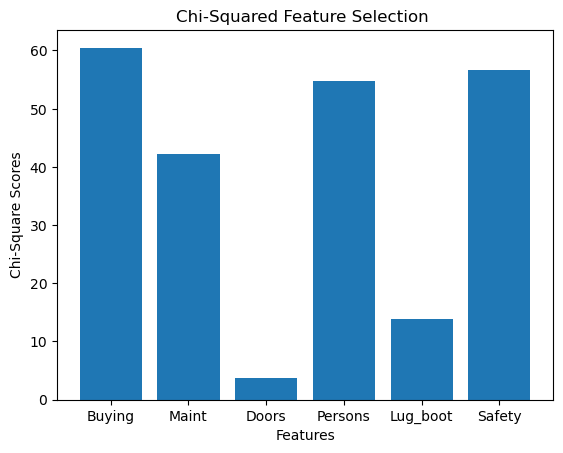

In [28]:
#Task 4
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot scores
labels = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,tick_label=labels)
plt.show()

In [ ]:
#Task 5 Data import and Exploartion
#Import dataset
BC_df = pd.read_csv('breast_cancer.csv')
BC_df.head()
print("Cancer data set dimensions : {}".format(BC_df.shape))

#Missing or Null Data points
BC_df.isnull().*****
BC_df.*****

# show summary statistics
#print(BC_df.describe())

# counting values of variables in 'diagnosis'
ax = sns.countplot(x="diagnosis", data=*****, palette="flare")
ax.set_title('Number of samples in each class (M: Malignant, B: Benign )', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.*****

In [ ]:
#Task 6 Data Prepration
# Set the input (X) and output/target (y) 
X = BC_df.iloc[:, 1:31].values 
y = BC_df.iloc[:, 31].values

#Encoding categorical data values
labelencoder_y = *****
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(*****)

In [ ]:
#Task 7 ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores

fs = SelectKBest(score_func=f_classif, k=30) 
fs.fit(X_train,*****)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.*****

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


fs_score_df['Feature Name']=BC_df.columns[1:31]
fs_score_df.rename( columns={0:'Score'}, inplace=True )
fs_score_df=fs_score_df.sort_values(by=['Score'], ascending=False)
fs_score_df # Feature ranking based on ANOVA Feature selection